# Students performance Analysis 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline     
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df =pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [6]:
df.shape

(1000, 8)

In [7]:
rows, columns =df.shape 
print("Number Of Rows :",rows)
print("Numbetr Of Columns :",columns)

Number Of Rows : 1000
Numbetr Of Columns : 8


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Comperision Of Male & Female')

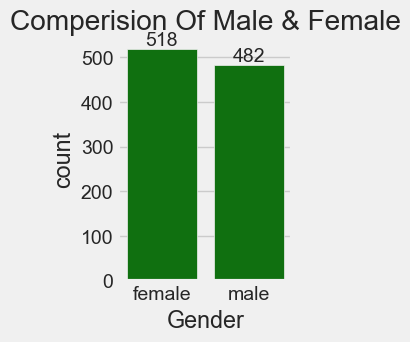

In [9]:
plt.figure(figsize=(2,3))
box=sns.countplot(data=df,x='gender',color='green')
box.bar_label(box.containers[0])            #  we count the total box contain numbers :- 
                                                    # [0] = horizantal showers if [1] = verticals showers 
plt.ylabel('count')
plt.xlabel('Gender')
plt.title("Comperision Of Male & Female")

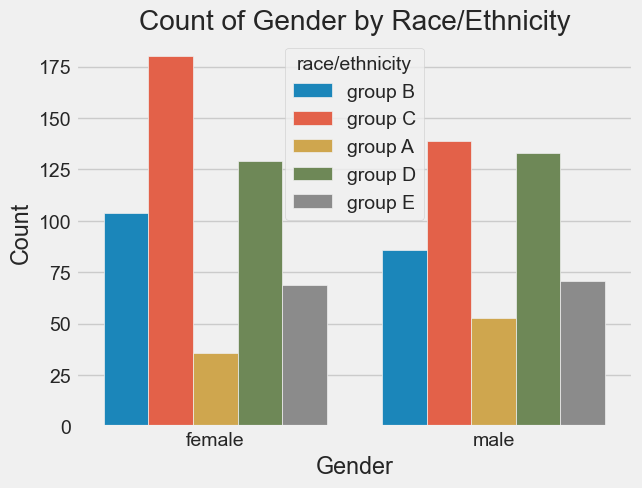

In [10]:

sns.countplot(data=df, x='gender', hue='race/ethnicity')

# Optionally, you can add labels and customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender by Race/Ethnicity')

# Show the plot
plt.show()


In [11]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

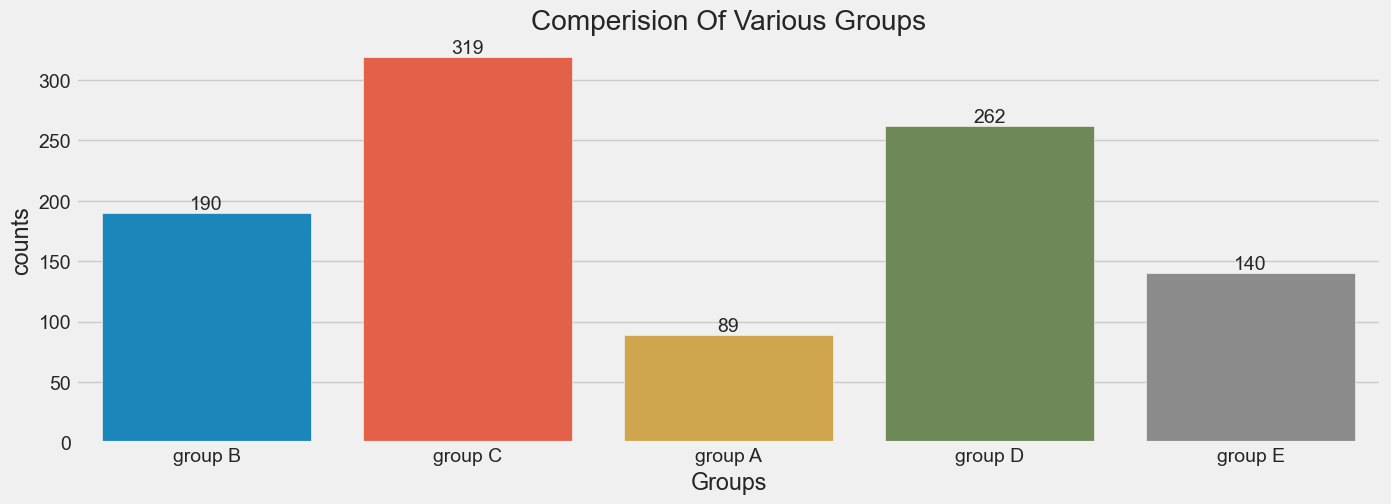

In [12]:
# visualization the different groups in the dataset 
plt.figure(figsize=(15,5))
box1= sns.countplot(data=df,x="race/ethnicity")
box1.bar_label(box1.containers[0]) 
plt.ylabel('counts')
plt.xlabel('Groups')
plt.title("Comperision Of Various Groups")
plt.show()

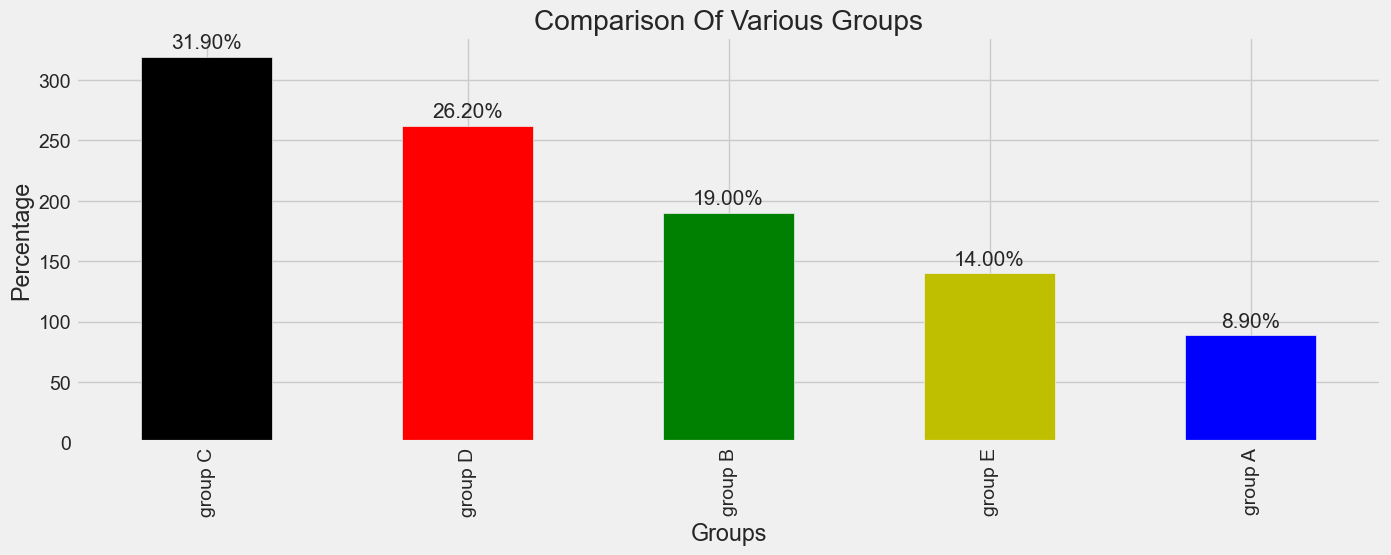

In [13]:
# Create the bar plot
plt.figure(figsize=(15, 5))
ax = df["race/ethnicity"].value_counts(dropna=False).plot.bar(color=["black", "r", "g", "y", "b"])

# Add labels to the bars
for bar in ax.patches:
    height = bar.get_height()
    percentage = (height / len(df)) * 100  
    
    
    text = f'{min(percentage, 100):.2f}%'  

    ax.annotate(text,  
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom', fontsize=15)


plt.ylabel('Percentage')
plt.xlabel('Groups')
plt.title("Comparison Of Various Groups")
plt.show()


In [14]:
gb1 = df.groupby('gender').agg({'math score':'mean','reading score':'mean','writing score':'mean'})
print(gb1)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


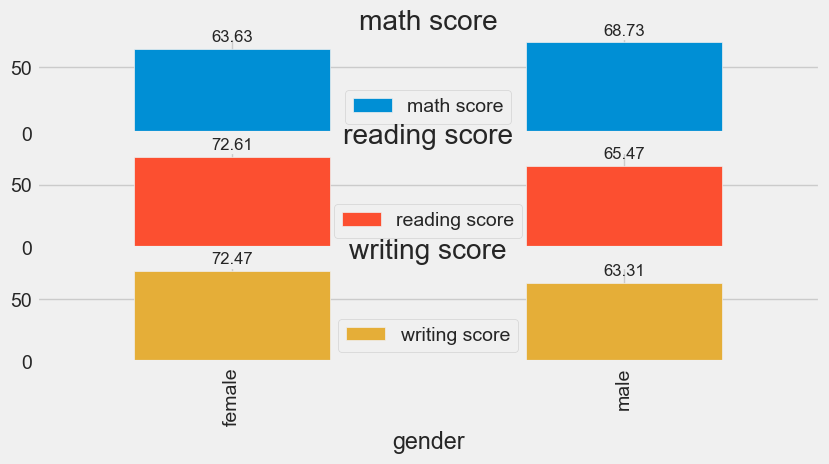

In [15]:
ax = gb1.plot(kind='bar', subplots=True, figsize=(9, 4))
for axes in ax:
    for bar in axes.patches:
        height = bar.get_height()
        axes.annotate(f'{height:.2f}',  
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  
                      textcoords='offset points',
                      ha='center', va='bottom', fontsize=12)
plt.show()


In [16]:
gb2 = df.groupby('race/ethnicity').agg({'math score':'mean','reading score':'mean','writing score':'mean'})
print(gb2)

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


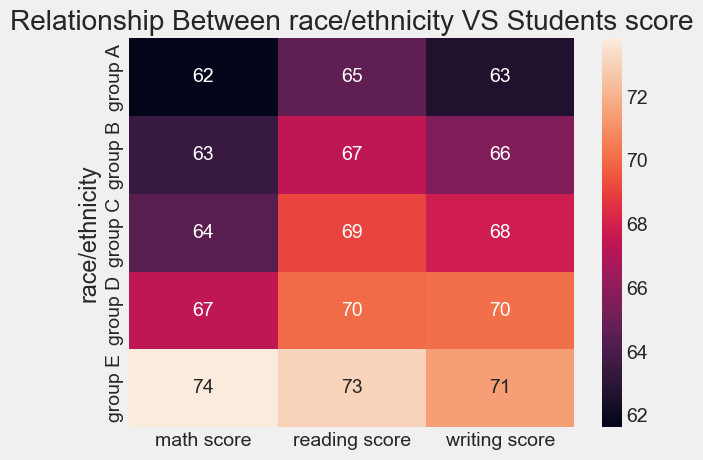

In [17]:
sns.heatmap(gb2,annot=True)
plt.title("Relationship Between race/ethnicity VS Students score")
plt.show()

# Visualizing the data of the different groups of parental edu.in the dataset

In [18]:
gb3 = df.groupby('parental level of education').agg({'math score':'mean','reading score':'mean','writing score':'mean'})
print(gb3)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


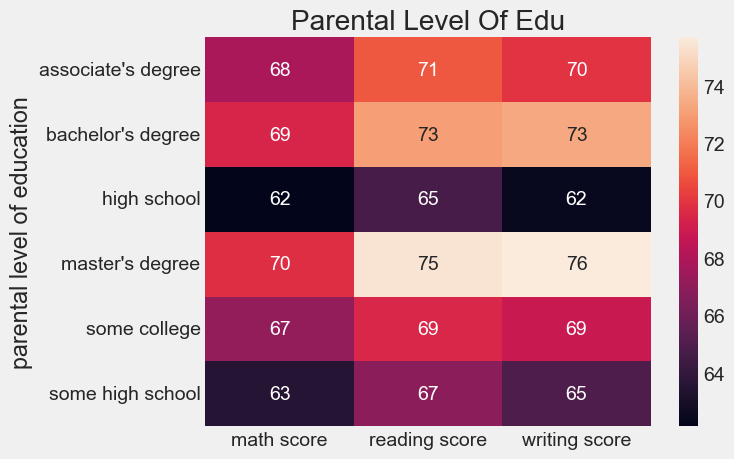

In [19]:
sns.heatmap(gb3,annot=True)
plt.title("Parental Level Of Edu")
plt.show()

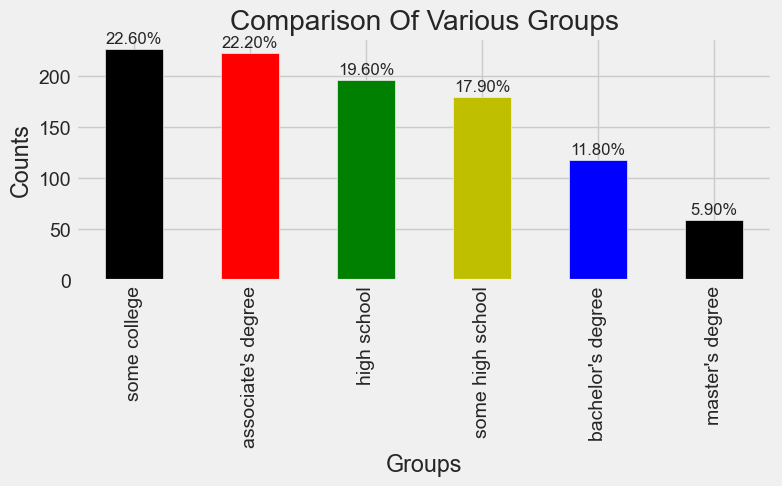

In [20]:
plt.figure(figsize=(8,3))
ax=df["parental level of education"].value_counts(dropna = False).plot.bar(color=["black","r","g","y","b"])


for bar in ax.patches:
    height = bar.get_height()
    percentage = (height / len(df)) * 100 
    
    text = f'{min(percentage, 100):.2f}%'  

    ax.annotate(text,  
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 2),  
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)


plt.ylabel('Counts')
plt.xlabel('Groups')
plt.title("Comparison Of Various Groups")
plt.show()

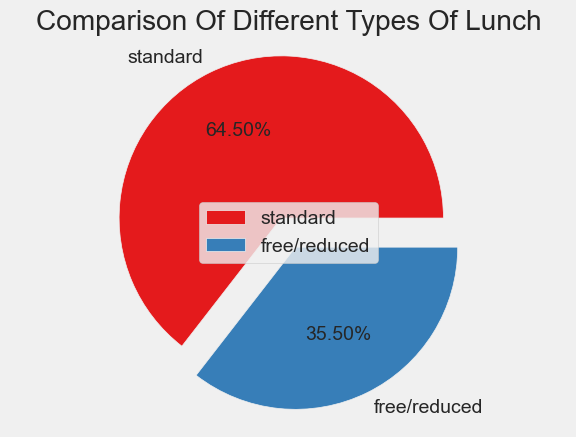

In [21]:
ex=[0.2,0]
plt.pie(df["lunch"].value_counts(), labels=df["lunch"].unique(), explode=ex ,autopct='%.2f%%', colors=sns.color_palette('Set1'))

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal') 
plt.legend(loc=10)
plt.title("Comparison Of Different Types Of Lunch")

# Display the pie chart
plt.show()


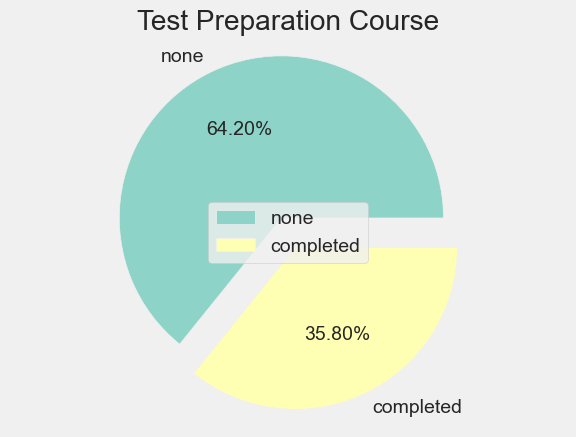

In [22]:
ex=[0.2,0]
plt.pie(df["test preparation course"].value_counts(), labels=df["test preparation course"].unique(), 
        explode=ex ,autopct='%.2f%%', colors=sns.color_palette("Set3"))
plt.axis('equal') 
plt.legend(loc=10)
plt.title("Test Preparation Course")
plt.show()


In [23]:
gb4 = df.groupby('test preparation course').agg({'math score':'mean','reading score':'mean','writing score':'mean'})
print(gb4)

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


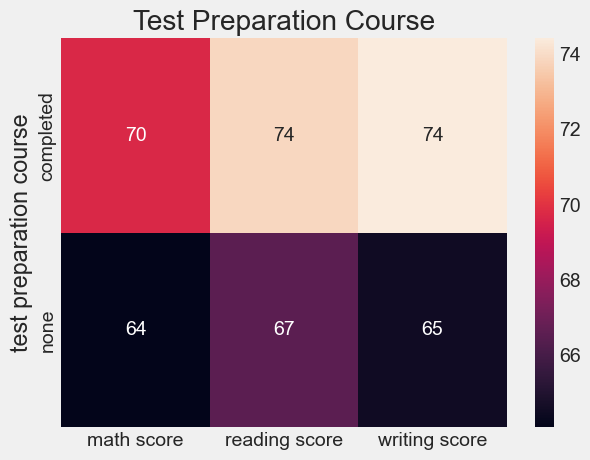

In [24]:
sns.heatmap(gb4,annot=True)
plt.title("Test Preparation Course")
plt.show()

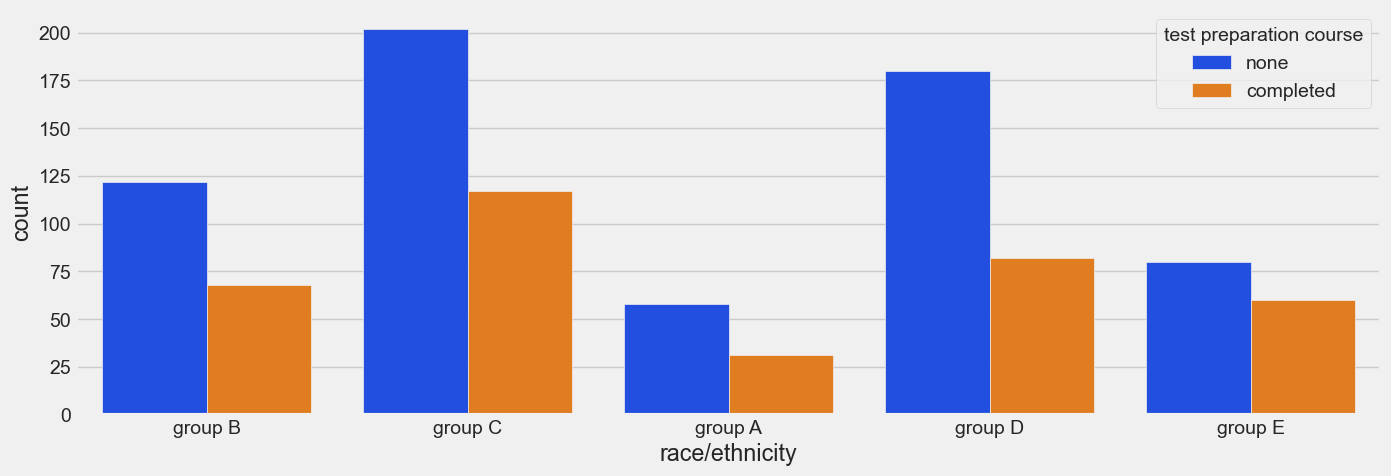

In [25]:
plt.subplots(figsize=(15,5))
sns.countplot(x="race/ethnicity",data = df,hue = "test preparation course",palette ="bright")
plt.show()

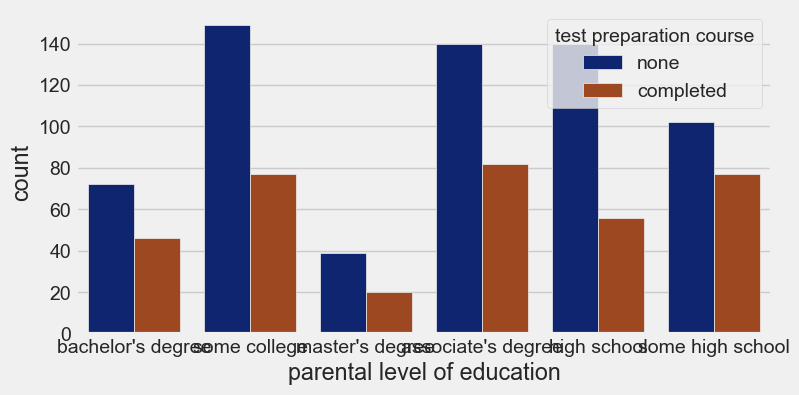

In [26]:
plt.subplots(figsize=(8,4))
sns.countplot(x="parental level of education",data = df,hue = "test preparation course",palette ="dark")
plt.show() # unwanted 

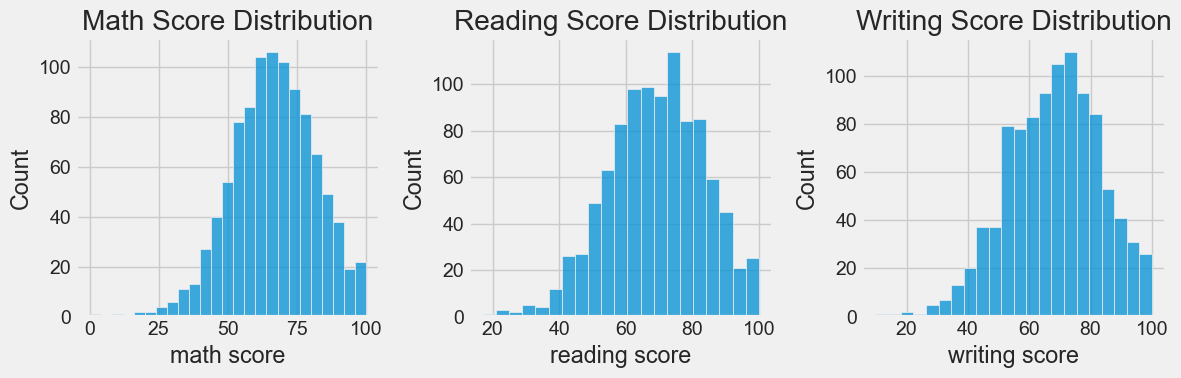

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x="math score", kde=False)  # Set kde=False to show count
plt.title("Math Score Distribution")

plt.subplot(1, 3, 2)
sns.histplot(data=df, x="reading score", kde=False)
plt.title("Reading Score Distribution")

plt.subplot(1, 3, 3)
sns.histplot(data=df, x="writing score", kde=False)
plt.title("Writing Score Distribution")

plt.tight_layout()  # Adjust spacing between subplots for better readability

plt.show()


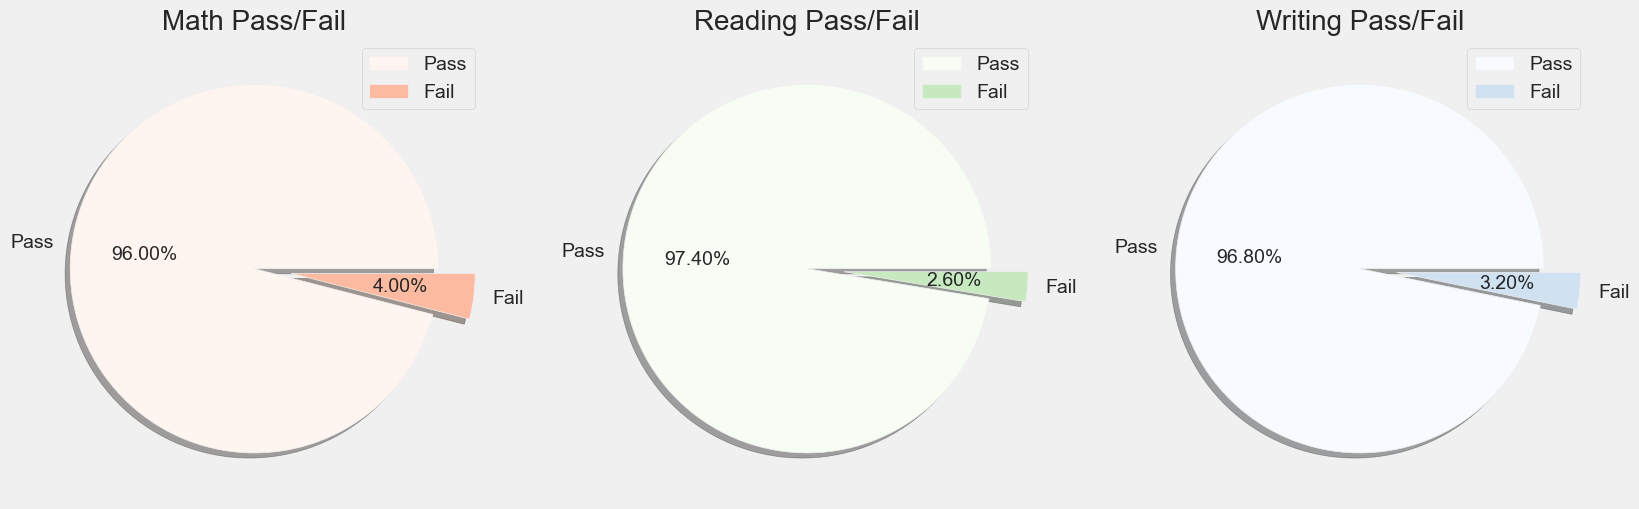

In [28]:

passmarks = 40
plt.rcParams["figure.figsize"] = (18, 12)

# Calculate pass/fail for each subject
df['pass_math'] = np.where(df['math score'] < passmarks, 'Fail', 'Pass')
df['pass_reading'] = np.where(df['reading score'] < passmarks, 'Fail', 'Pass')
df['pass_writing'] = np.where(df['writing score'] < passmarks, 'Fail', 'Pass')

size = df['pass_math'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 5))
labels = "Pass", "Fail"
ex = [0, 0.2]

plt.subplot(1, 3, 1)
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', explode=ex, shadow=True)
plt.title("Math Pass/Fail", fontsize=20)
plt.legend()

size = df['pass_reading'].value_counts()
colors = plt.cm.Greens(np.linspace(0, 1, 5))
labels = "Pass", "Fail"
ex1 = [0, 0.2]

plt.subplot(1, 3, 2)
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', explode=ex1, shadow=True)
plt.title("Reading Pass/Fail", fontsize=20)
plt.legend()

size = df['pass_writing'].value_counts()  # Using pass_writing column here
colors = plt.cm.Blues(np.linspace(0, 1, 6))  # Only two values: "Pass" and "Fail"
labels = "Pass", "Fail"
ex2 = [0, 0.2]

plt.subplot(1, 3, 3)
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', explode=ex2, shadow=True)
plt.title("Writing Pass/Fail", fontsize=20)
plt.legend()

plt.show()


# overall result 

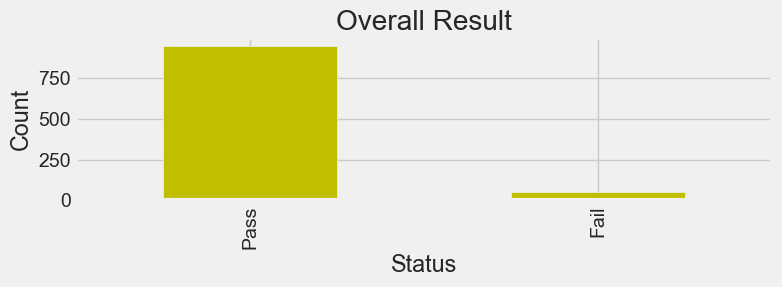

In [29]:


df['status'] = df.apply(lambda x: "Fail" if (x['pass_math'] == 'Fail' or
                                              x['pass_reading'] == "Fail" or
                                              x['pass_writing'] == 'Fail')
                         else "Pass", axis=1)

plt.figure(figsize=(8, 2))

df["status"].value_counts(dropna=False).plot.bar(color="y")
plt.title("Overall Result")
plt.xlabel("Status")
plt.ylabel("Count")

plt.show()


In [30]:
 #Assigning grades to the grades according to the following criteria :
#0 - 40 marks : Grade E
#0 - 60 marks : Grade D
#0 - 70 marks : Grade C
#0 - 80 marks : Grade B
#0 - 90 marks : Grade A
#0 - 100 marks : Grade EX

In [31]:
from math import * 
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['percentage']=df['total_score']/3

#Assuming df is your DataFrame with appropriate columns: 'math score', 'reading score', 'writing score', and 'status'

def getgrade(percentage, status):
    if status == "Fail":
        return "EX"
    if percentage >= 80:
        return "A"
    if percentage >= 70:
        return "B"
    if percentage >= 60:
        return "C"
    if percentage >= 40:
        return "D"
    else:
        return "EX"

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis=1)
grade_counts = df['grades'].value_counts()

print(grade_counts)


grades
B     261
C     256
D     234
A     198
EX     51
Name: count, dtype: int64


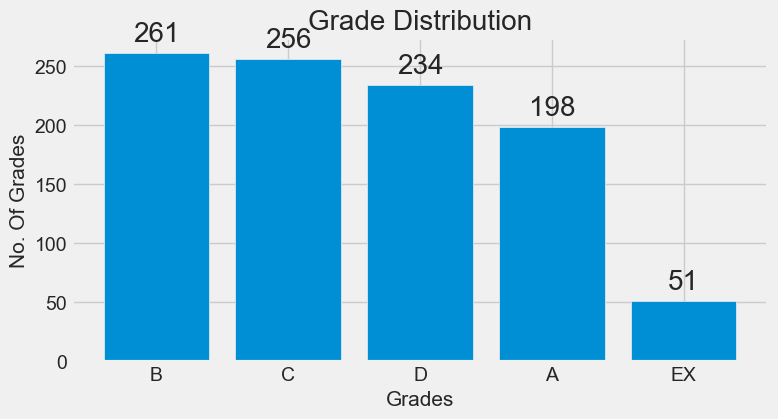

In [32]:
# Plotting the bar graph
plt.figure(figsize=(8, 4))
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel("Grades", fontsize=15)
plt.ylabel("No. Of Grades", fontsize=15)
plt.title("Grade Distribution", fontsize=20)

# Adding values on top of the bars
for i, value in enumerate(grade_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=20)

plt.show()

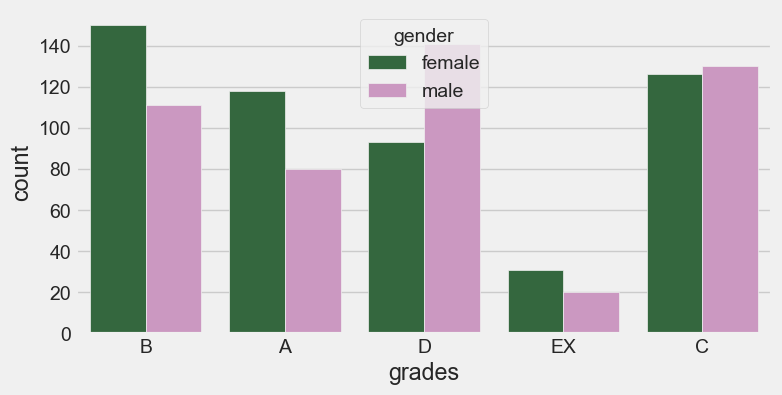

In [33]:
plt.subplots(figsize=(8,4))
sns.countplot(x=df['grades'],data=df,hue=df['gender'],palette='cubehelix')
plt.show()

# Data Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder
lc =LabelEncoder()
df["gender"]=lc.fit_transform(df["gender"])
df["race/ethnicity"]=lc.fit_transform(df["race/ethnicity"])
df["parental level of education"]=lc.fit_transform(df["parental level of education"])
df["test preparation course"]=lc.fit_transform(df["test preparation course"])
df["lunch"]=lc.fit_transform(df["lunch"])
df["pass_math"]=lc.fit_transform(df["pass_math"])
df["pass_reading"]=lc.fit_transform(df["pass_reading"])
df["pass_writing"]=lc.fit_transform(df["pass_writing"])
df["grades"]=lc.fit_transform(df["grades"])
df["status"]=lc.fit_transform(df["status"])


df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,status,total_score,percentage,grades
0,0,1,1,1,1,72,72,74,1,1,1,1,218,72.666667,1
1,0,2,4,1,0,69,90,88,1,1,1,1,247,82.333333,0
2,0,1,3,1,1,90,95,93,1,1,1,1,278,92.666667,0
3,1,0,0,0,1,47,57,44,1,1,1,1,148,49.333333,3
4,1,2,4,1,1,76,78,75,1,1,1,1,229,76.333333,1
5,0,1,0,1,1,71,83,78,1,1,1,1,232,77.333333,1
6,0,1,4,1,0,88,95,92,1,1,1,1,275,91.666667,0
7,1,1,4,0,1,40,43,39,1,1,0,0,122,40.666667,4
8,1,3,2,0,0,64,64,67,1,1,1,1,195,65.000000,2
9,0,1,2,0,1,38,60,50,0,1,1,0,148,49.333333,4


In [35]:
from sklearn.model_selection import train_test_split
df['mean score']=((df["math score"]+df['reading score']+df['writing score'])/3).round()
y = df["mean score"]
x=df.drop(['mean score'],axis=1)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2 , random_state =0 )

In [36]:
from sklearn.linear_model import LogisticRegression 

# Create a LogisticRegression model with 'liblinear' solver and a random seed (random_state)
model = LogisticRegression(solver='liblinear', random_state=0)


In [37]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [38]:
prediction = model.predict(x_test)

In [39]:
prediction

array([69., 80., 50., 59., 73., 73., 71., 46., 87., 40., 59., 69., 92.,
       80., 59., 50., 59., 82., 59., 78., 65., 54., 78., 68., 54., 69.,
       59., 59., 75., 82., 83., 86., 93., 67., 56., 80., 87., 64., 75.,
       74., 69., 59., 68., 75., 70., 66., 82., 65., 90., 56., 40., 64.,
       59., 59., 38., 71., 54., 69., 74., 69., 69., 74., 53., 71., 60.,
       76., 71., 52., 60., 59., 71., 80., 71., 68., 56., 69., 74., 71.,
       39., 73., 76., 87., 69., 82., 69., 75., 69., 92., 76., 56., 71.,
       67., 64., 59., 79., 71., 59., 63., 71., 68., 49., 80., 61., 49.,
       78., 78., 76., 59., 53., 82., 76., 69., 39., 51., 72., 72., 76.,
       73., 83., 60., 54., 70., 83., 82., 71., 58., 73., 76., 74., 72.,
       69., 61., 23., 86., 76., 54., 69., 69., 69., 86., 71., 67., 59.,
       62., 76., 59., 50., 48., 83., 80., 52., 74., 79., 71., 76., 80.,
       56., 65., 52., 49., 82., 49., 49., 80., 69., 73., 78., 80., 52.,
       61., 52., 69., 30., 69., 90., 76., 69., 59., 87., 73., 68

In [40]:
y_test

993    69.0
859    77.0
298    45.0
553    68.0
672    74.0
       ... 
679    61.0
722    84.0
215    81.0
653    70.0
150    66.0
Name: mean score, Length: 200, dtype: float64

In [41]:
difference = abs(prediction - y_test)

In [42]:
difference.mean()

3.99